In [1]:
import altair as alt
import json
from pathlib import Path

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [3]:
%run theme.py

In [4]:
datafiles = Path("../data/interim/")

In [5]:
files = list(datafiles.glob("ACS_ca_BAs2012-2016__*"))

list(enumerate(files))

[(0, PosixPath('../data/interim/ACS_ca_BAs2012-2016____.geojson')),
 (1, PosixPath('../data/interim/ACS_ca_BAs2012-2016__HS__.geojson')),
 (2,
  PosixPath('../data/interim/ACS_ca_BAs2012-2016__Some college-AA__.geojson')),
 (3, PosixPath('../data/interim/ACS_ca_BAs2012-2016__B.A.+__.geojson'))]

In [6]:
with open("../data/interim/ACS_ca_BAs2012-2016.geojson", "r") as file:
    ca_data = json.load(file)

In [7]:
with open(files[1], "r") as file:
    hs_data = json.load(file)
    
with open(files[2], "r") as file:
    ba_data = json.load(file)
    
with open(files[3], "r") as file:
    aa_data = json.load(file)

In [8]:
data = alt.Data(values = ca_data['features'])

hs_data = alt.Data(values = hs_data['features'])
aa_data = alt.Data(values = aa_data['features'])
ba_data = alt.Data(values = ba_data['features'])

In [9]:
base = alt.Chart(data).mark_geoshape(stroke = 'black', strokeWidth = .5, fill = '#FCFCFC').encode().properties(width = 1080, height = 1350, title = "#100Viz 17 - BAs in the Bay (Remix)")

In [10]:
choro_hs = alt.Chart(hs_data).mark_geoshape(stroke = 'black', strokeWidth = .5, fill = '#FCFCFC').encode(
    color = alt.Color('properties.share:Q', title = "HS or lower", legend = alt.Legend(format = '%', orient="right", offset = 0,), scale = alt.Scale(scheme = 'blues', type = "bin-linear", domain=[0, .80]))
).properties(width = 1080, height = 1350)

choro_aa = alt.Chart(aa_data).mark_geoshape(stroke = 'black', strokeWidth = .5, fill = '#FCFCFC').encode(
    color = alt.Color('properties.share:Q', title = "Some college", legend = alt.Legend(format = '%', orient="right", offset = 0, ), scale = alt.Scale(scheme = 'greens', type = "bin-linear", domain=[0, .80]))
).properties(width = 1080, height = 1350)

choro_ba = alt.Chart(ba_data).mark_geoshape(stroke = 'black', strokeWidth = .5, fill = '#FCFCFC').encode(
    color = alt.Color('properties.share:Q', title = "B.A. or higher", legend = alt.Legend(format = '%', orient="right", offset = 0, ), scale = alt.Scale(scheme = 'oranges', type = "bin-linear", domain=[0, .80]))
).properties(width = 1080, height = 1350)

In [11]:
labels = alt.Chart(data).mark_text(baseline='top', fill = 'black', align = 'center', stroke = "white", strokeWidth = 0.05, dy = -10).encode(
         longitude='properties.centroid_lon:Q',
         latitude='properties.centroid_lat:Q',
         text='properties.name_and_value:O',
         size=alt.value(10),
         opacity=alt.value(1),
).properties(width = 1080, height = 1350)

In [12]:
names = alt.Chart(data).mark_text(baseline='bottom', fill = 'black', align = 'center', strokeWidth=0.01, stroke='white').encode(
         longitude='properties.centroid_lon:Q',
         latitude='properties.centroid_lat:Q',
         text='properties.NAME:O',
         size=alt.value(10),
         opacity=alt.value(1),
).properties(width = 1080, height = 1350)

In [13]:
chart = base + choro_aa + choro_ba + names

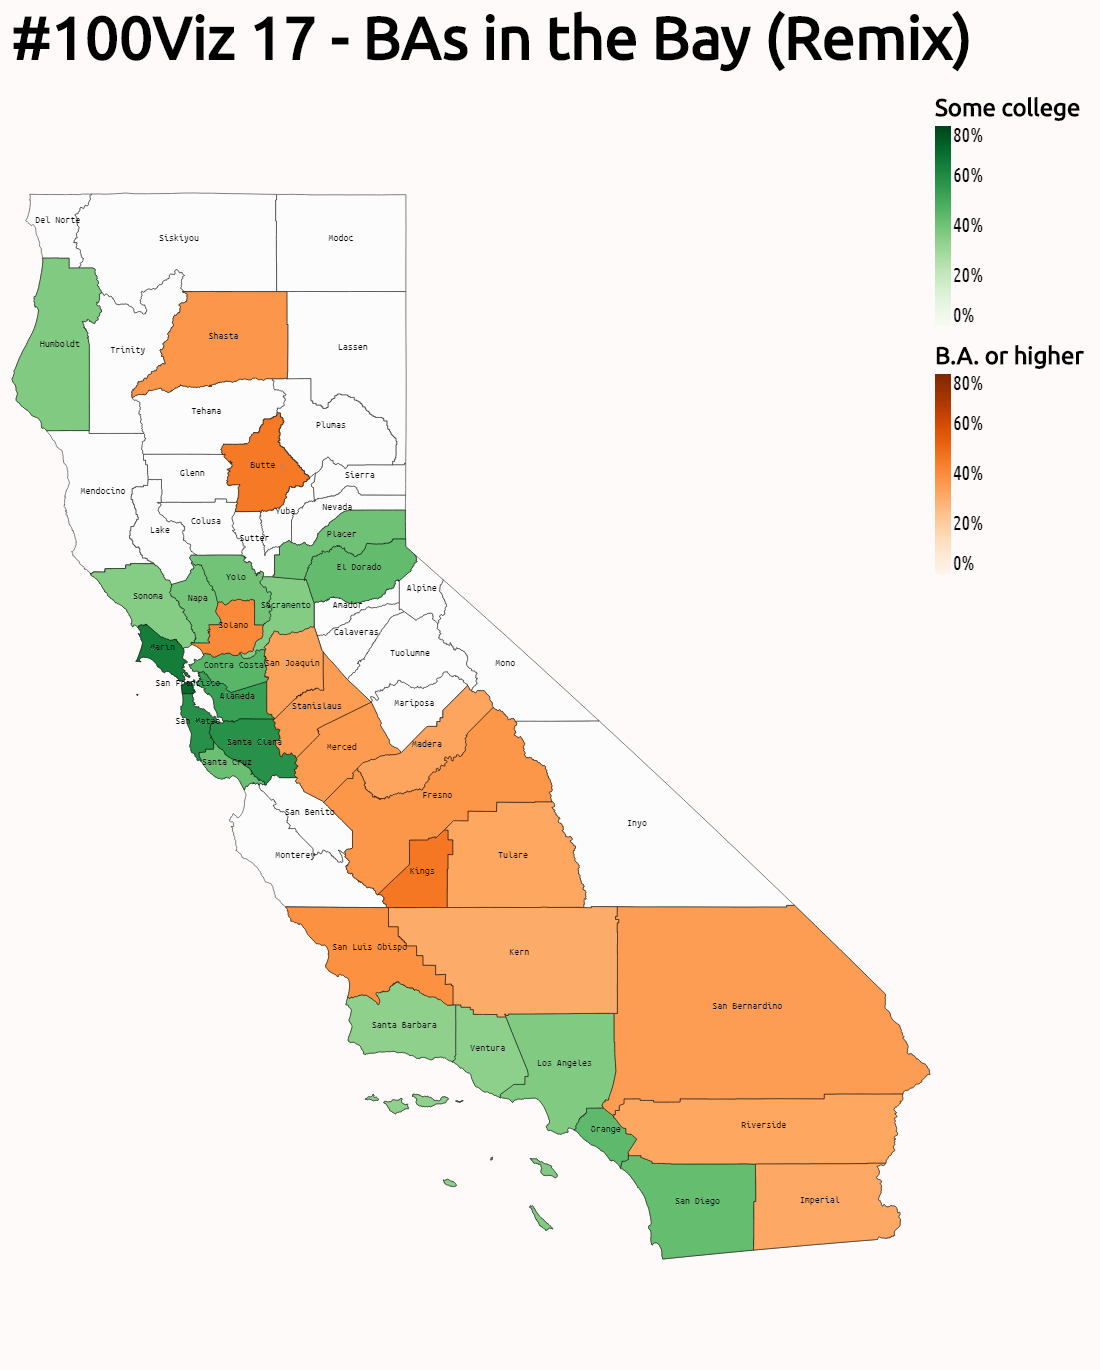

In [14]:
chart.configure_legend().resolve_scale(
    color='independent',
)